<a href="https://colab.research.google.com/github/AbdulrahmanAbdulqawi/AbdulrahmanAbdulqawi.github.io/blob/main/Or%20Gate%20With%20Two%20Lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.nn.parameter import Parameter

In [5]:
def gen_data(num_samples, noise=7):
  points = []
  labels = []

  for i in range(num_samples):
    x = np.random.uniform()
    y = np.random.uniform()

    nx = np.random.uniform(low=-noise/100, high=noise/100)
    ny = np.random.uniform(low=-noise/100, high=noise/100)

    if(-0.3*x-y +0.45 > 0 or -0.3*x-y +0.85 < 0 ):
        if noise > 0:
            points.append([x+nx, y+ny, 0])
            labels.append(0)
        else:
            points.append([x, y, 0])
            labels.append(0)
    else:
        if noise > 0:
            points.append([x+nx, y+ny, 1])
            labels.append(1)
        else:
            points.append([x, y, 1])
            labels.append(1)

  return points, labels

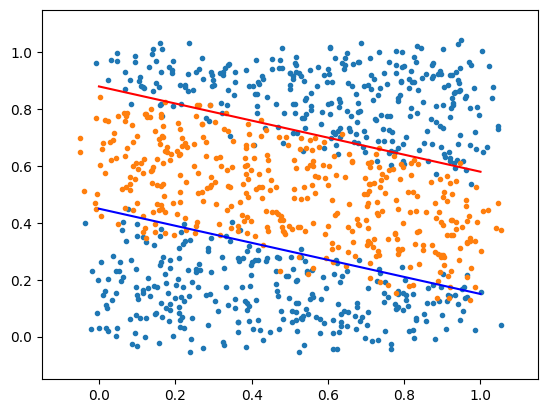

In [7]:
points, labels = gen_data(1000, 7)


plt.plot([i[0] for i in points if i[2] == 0], [i[1] for i in points if i[2] == 0], '.')
plt.plot([i[0] for i in points if i[2] == 1], [i[1] for i in points if i[2] == 1], '.')

# plot lines
x = torch.linspace(0, 1, steps=100)
plt.plot(x.numpy(), (-0.3 * x.numpy() + 0.45), 'blue')     # y = 0.9*x+0.1 => 0.9*x-y+0.1 < 0
plt.plot(x.numpy(), (-0.3*x.numpy() +0.88), 'red')    # y = 0.9*x+0.1 => 0.9*x-y+0.1 < 0

plt.ylim(-0.15, 1.15)
plt.xlim(-0.15, 1.15)
plt.show()

In [8]:

class SquashingFunction(nn.Module):

    def __init__(self,learnable=True, beta=0.1):

        super(SquashingFunction, self).__init__()

        self.alpha = 0.5
        self.lam = 1.0

        if learnable:
            # initialize beta as learnable parameter
            self.beta = Parameter(torch.tensor(beta))
            self.beta.requiresGrad = True
        else:
            # static value
            self.beta = torch.tensor(beta)
            self.beta.requiresGrad = False


    def forward(self, x):
        '''
        Forward pass of the function.
        '''
        #print("Beta:", self.beta.data.item())
        # define beta global for pandas print
        global betas
        betas = self.beta.data.item()
        return (1/(self.lam * self.beta)) * torch.log( (1+torch.exp(self.beta*(x-(self.alpha-(self.lam/2)))) ) / (1+torch.exp(self.beta*(x-(self.alpha+(self.lam/2))))) )

In [9]:
trainX = torch.Tensor([[i[0],i[1]] for i in points]).float()
trainY = torch.Tensor([[i[2]] for i in points]).float()

This is for the OR Gate!!

In [10]:
class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()

        #creating the neurons
        self.n1 = nn.Linear(2, 1)
        self.n2 = nn.Linear(2, 1)

        #initializing the activation function(Squashing function)
        self.activation_n1 = SquashingFunction()
        self.activation_n2 = SquashingFunction()
        self.activation_or = SquashingFunction()

        #creating OR gate
        self.or_layer = nn.Linear(in_features=2, out_features=1)
        self.or_layer.weight.requires_grad = False
        self.or_layer.bias.requires_grad  = False
        #passing the initial values of the weights and bias
        with torch.no_grad():
            self.or_layer.weight.fill_(1.0)
            self.or_layer.bias.fill_(0.0)
    def forward(self, X):
        global beta_or
        global beta_n1
        global beta_n2
        global betagerade
        self.z1 = self.n1(X)
        self.z1 = self.activation_n1(self.z1)      # activation function


        self.z2 = self.n2(X)
        self.z2 = self.activation_n2(self.z2)      # activation function
        betagerade = betas

        self.out = self.or_layer(torch.cat((self.z1,self.z2), 1))
        self.out = self.activation_or(self.out)
        beta_or = betas



        return self.out


  Loss: 0.25248628854751587
Beta-Gerade: 0.10000000149011612
Beta-AND: 0.10000000149011612


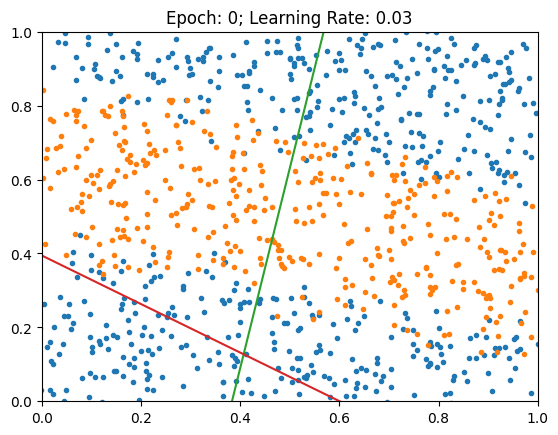

  Loss: 0.24054838716983795
Beta-Gerade: 0.1817840039730072
Beta-AND: -0.847669780254364


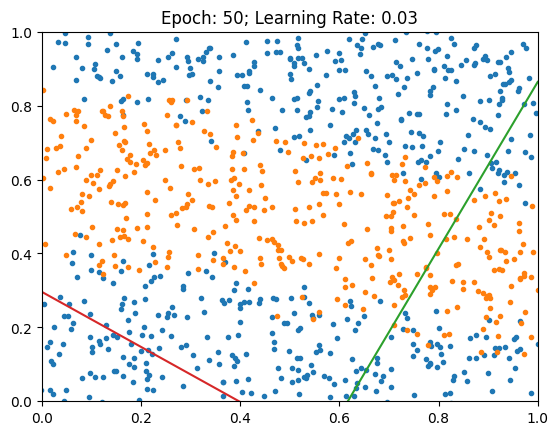

  Loss: 0.23997682332992554
Beta-Gerade: 0.9726153016090393
Beta-AND: -0.8851444721221924


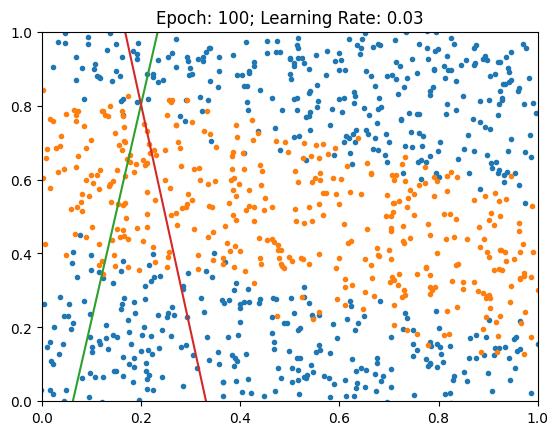

  Loss: 0.22435696423053741
Beta-Gerade: 2.6321394443511963
Beta-AND: -1.1236329078674316


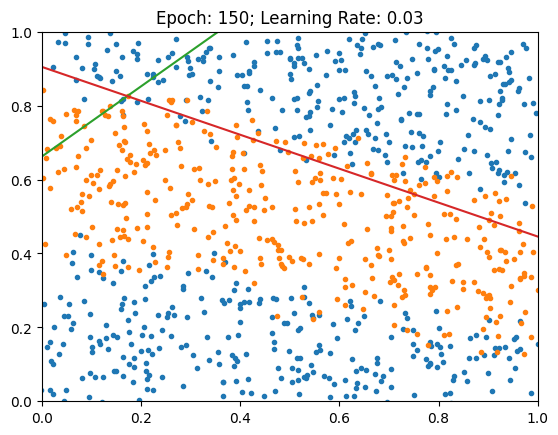

  Loss: 0.09054028242826462
Beta-Gerade: 5.355082988739014
Beta-AND: -3.713486433029175


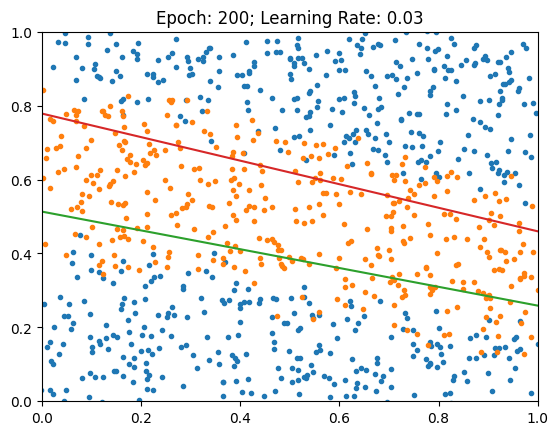

  Loss: 0.0702340230345726
Beta-Gerade: 6.157616138458252
Beta-AND: -5.05908203125


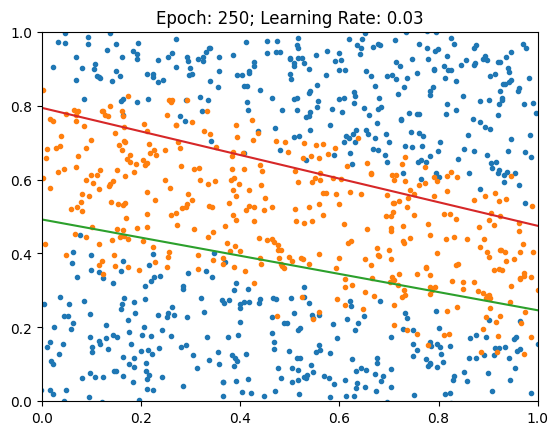

  Loss: 0.0644923523068428
Beta-Gerade: 6.598121166229248
Beta-AND: -5.798079967498779


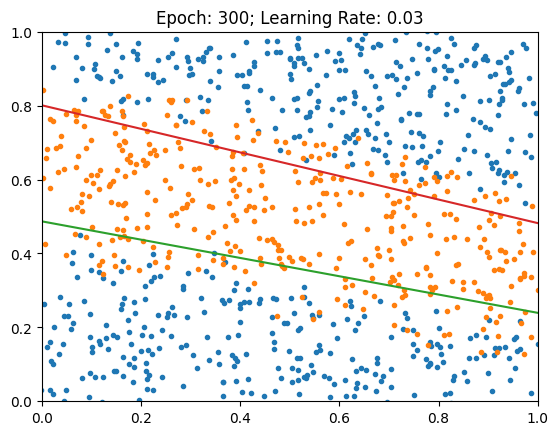

  Loss: 0.06157594174146652
Beta-Gerade: 6.916324615478516
Beta-AND: -6.34982967376709


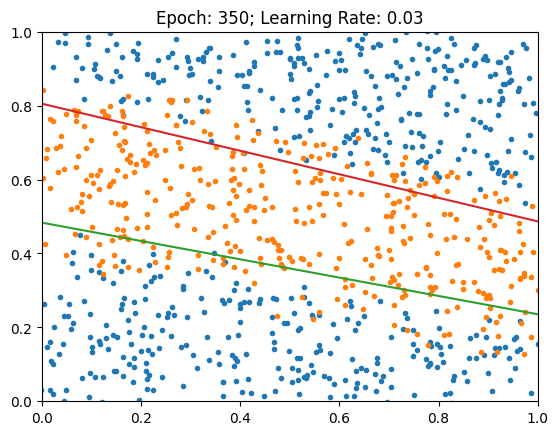

  Loss: 0.05979576334357262
Beta-Gerade: 7.1661481857299805
Beta-AND: -6.804691314697266


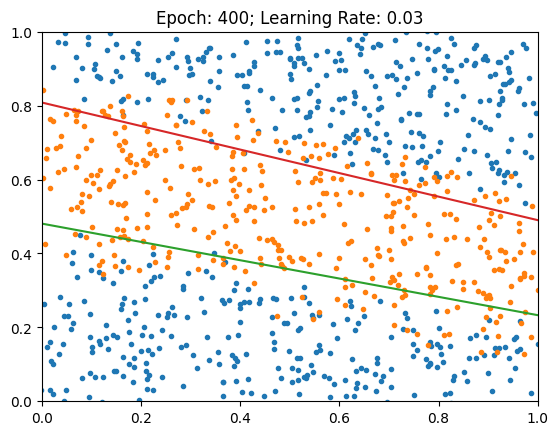

  Loss: 0.058597855269908905
Beta-Gerade: 7.370784759521484
Beta-AND: -7.198495388031006


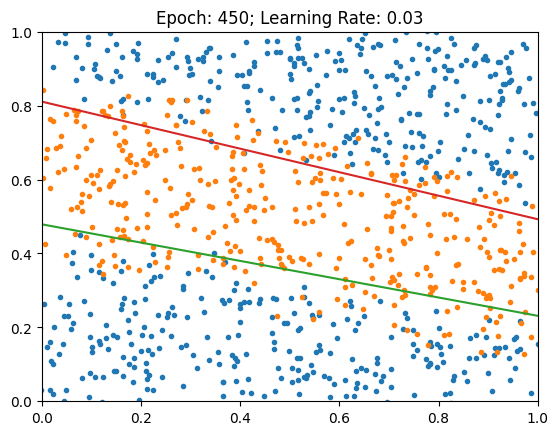

  Loss: 0.057739097625017166
Beta-Gerade: 7.54284143447876
Beta-AND: -7.549763202667236


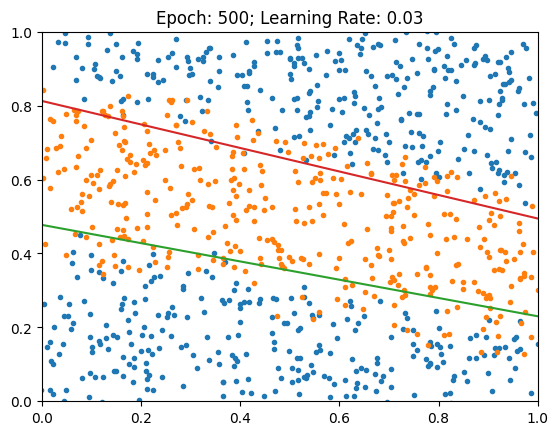

  Loss: 0.057094756513834
Beta-Gerade: 7.690089702606201
Beta-AND: -7.869485855102539


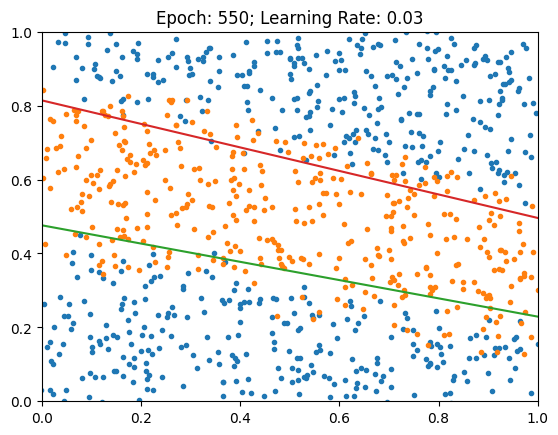

  Loss: 0.056593988090753555
Beta-Gerade: 7.817736625671387
Beta-AND: -8.164796829223633


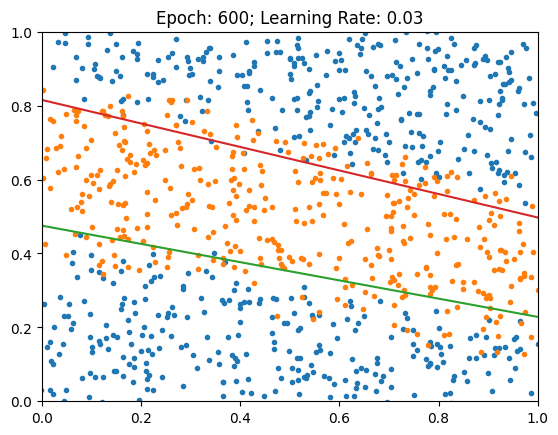

  Loss: 0.05619353428483009
Beta-Gerade: 7.929488658905029
Beta-AND: -8.440622329711914


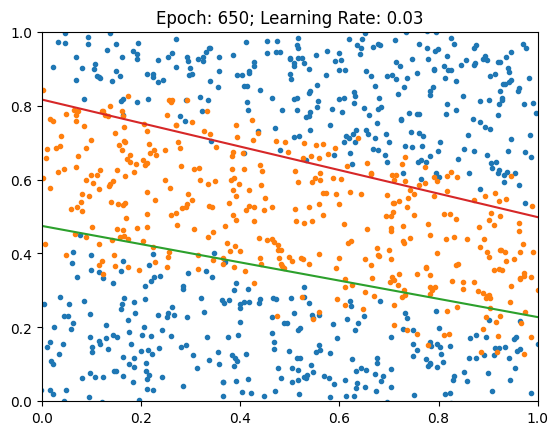

  Loss: 0.05586550757288933
Beta-Gerade: 8.028111457824707
Beta-AND: -8.700546264648438


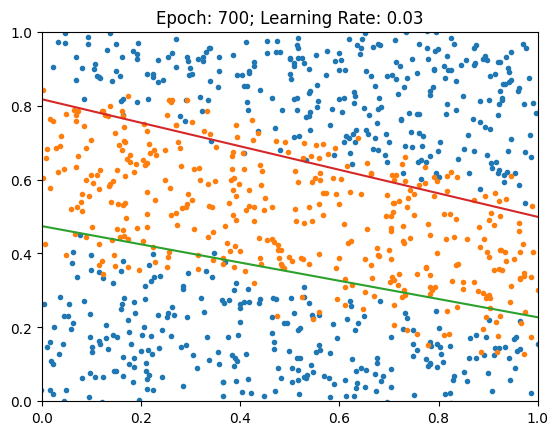

  Loss: 0.05559122562408447
Beta-Gerade: 8.115741729736328
Beta-AND: -8.947237014770508


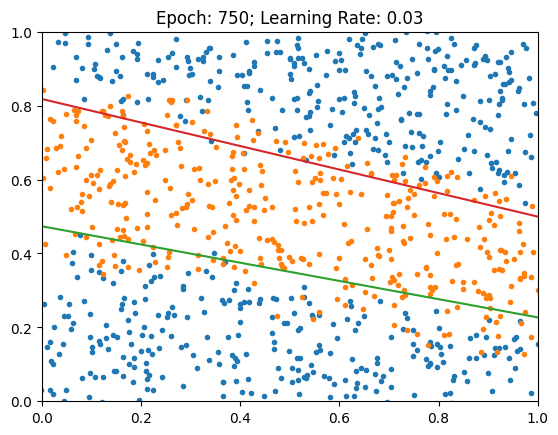

  Loss: 0.055357675999403
Beta-Gerade: 8.194086074829102
Beta-AND: -9.182781219482422


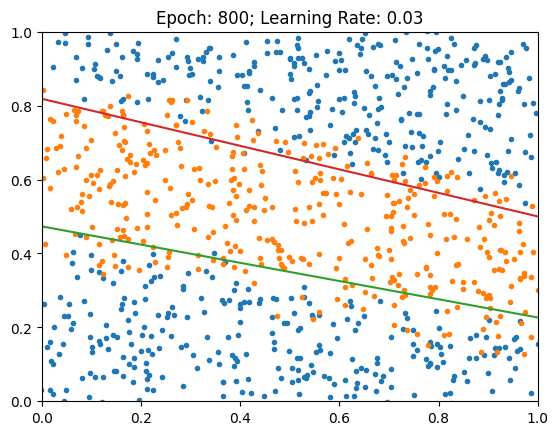

  Loss: 0.05515560880303383
Beta-Gerade: 8.264544486999512
Beta-AND: -9.408814430236816


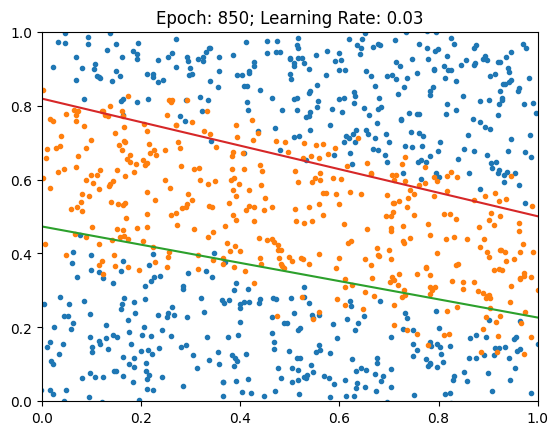

  Loss: 0.05498002469539642
Beta-Gerade: 8.328289985656738
Beta-AND: -9.626666069030762


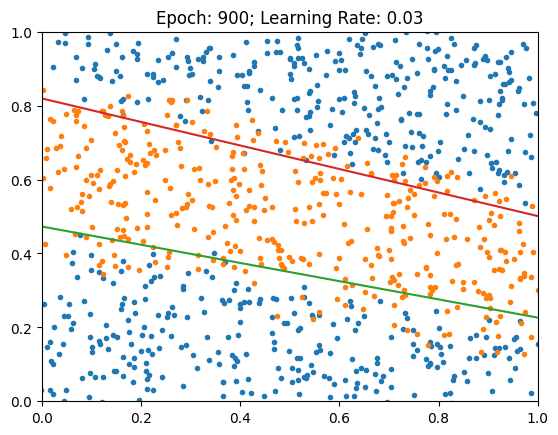

  Loss: 0.05482073873281479
Beta-Gerade: 8.386321067810059
Beta-AND: -9.837423324584961


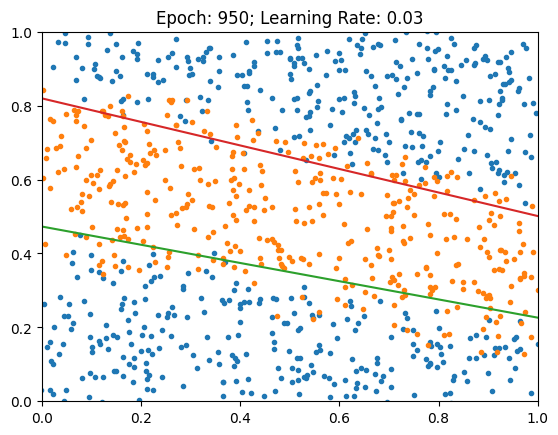

In [11]:
learning_rate = 0.03
network = SimpleNetwork()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

beta_gerade = []
beta_or_arr = []
loss_arr = []
running_loss =0

for epoch in range(1000):
    preds = network(trainX)
    #print(preds)
    loss = criterion(preds, trainY) # Calculate loss
    optimizer.zero_grad()
    loss.backward() # Calculate Gradient
    optimizer.step() # Update Weights

    beta_gerade.append(betagerade)
    beta_or_arr.append(beta_or)
    loss_arr.append(loss.item())
    running_loss += loss.item()

    if epoch %50 == 0:


        y1 = -((network.n1.weight.squeeze()[0] * x + network.n1.bias[0]) / network.n1.weight.squeeze()[1])
        y2 = -((network.n2.weight.squeeze()[0] * x + network.n2.bias[0]) / network.n2.weight.squeeze()[1])



        plt.plot([i[0] for i in points if i[2] == 0], [i[1] for i in points if i[2] == 0], '.')
        plt.plot([i[0] for i in points if i[2] == 1], [i[1] for i in points if i[2] == 1], '.')

        plt.plot(x.numpy(), y1.detach().numpy(), '-')
        plt.plot(x.numpy(), y2.detach().numpy(), '-')
        #print("Beta:", betas)
        print(f'  Loss: {loss}')
        print("Beta-Gerade:", betagerade)
        print("Beta-AND:", beta_or)
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title(f'Epoch: {epoch}; Learning Rate: {learning_rate}')
        plt.show()

<function matplotlib.pyplot.show>

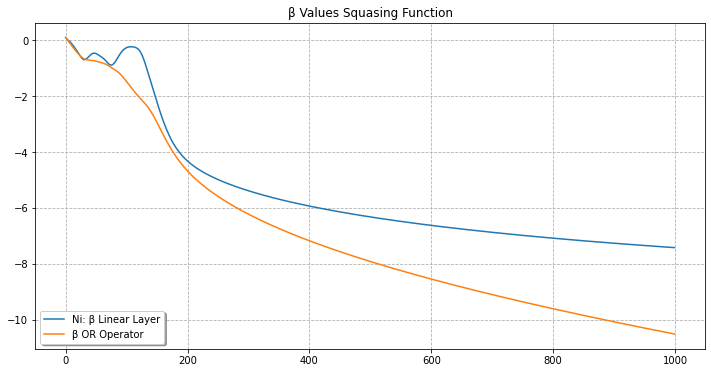

<function matplotlib.pyplot.show>

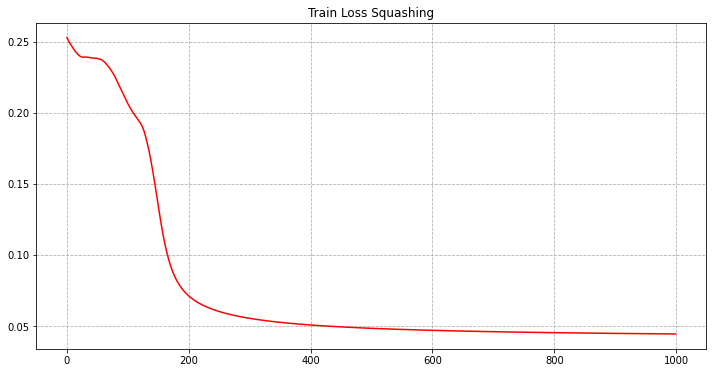

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Train Loss Squashing')
plt.plot(loss_arr, label='Loss', color='r')
plt.grid(True, axis='both', linestyle='--')
plt.show